In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score
from tqdm import tqdm


In [ ]:

# Load the dataset
file_path = '../The_Ha_Files/CP_count_Ha.csv'  
data =  pd.read_csv(file_path)

# List of assay columns to process (assuming all columns except INCHIKEY and the last 13 columns are assays)
assay_columns = data.columns[1:-12]

# Initialize a list to store results
results = []

# Define a function to calculate a probability score based on the distance from the threshold
def calculate_probability_score(value, threshold):
    return 1 / (1 + np.exp(value - threshold))

# Define threshold range based on the dataset
min_value = data['Cells_Number_Object_Number'].min()
max_value = data['Cells_Number_Object_Number'].max()
thresholds = np.arange(min_value, max_value, 1)

# Process each assay and each threshold
for assay in tqdm(assay_columns):
    # Drop rows with NaNs or -1s in the current assay column or in Cells_Number_Object_Number
    valid_data = data[(data[assay] != -1) & (data[assay].notna())].copy().reset_index(drop=True)

    # Process for each threshold
    for threshold in thresholds:
    
        # Calculate the probability score
        valid_data.loc[:, 'Probability_Score'] = valid_data['Cells_Number_Object_Number'].apply(calculate_probability_score, threshold=threshold)
        # print(valid_data[['Probability_Score']])
        # True values for the assay
        true_values = valid_data[assay] == 1
        predicted_probs = valid_data['Probability_Score']
        predicted_values = valid_data['Probability_Score'] >= 0.5

        # Calculate TP, FP, TN, FN
        TP = np.sum((predicted_values == 1) & (true_values == 1))
        FP = np.sum((predicted_values == 1) & (true_values == 0))
        TN = np.sum((predicted_values == 0) & (true_values == 0))
        FN = np.sum((predicted_values == 0) & (true_values == 1))

        # Calculate metrics
        accuracy = accuracy_score(true_values, predicted_values)
        balanced_accuracy = balanced_accuracy_score(true_values, predicted_values)
        recall = recall_score(true_values, predicted_values, zero_division=0)
        precision = precision_score(true_values, predicted_values, zero_division=0)
        auc = roc_auc_score(true_values, predicted_probs)
        # print(auc)

        # Append the result
        results.append({
            'Assay': assay,
            'Accuracy': accuracy,
            'Balanced Accuracy': balanced_accuracy,
            'Recall': recall,
            'Precision': precision,
            'Threshold': threshold,
            'AUC': auc,
            'TP': TP,
            'FP': FP,
            'TN': TN,
            'FN': FN
        })
        
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('assay_auc_by_threshold_with_confusion_Ha.csv', index=False)


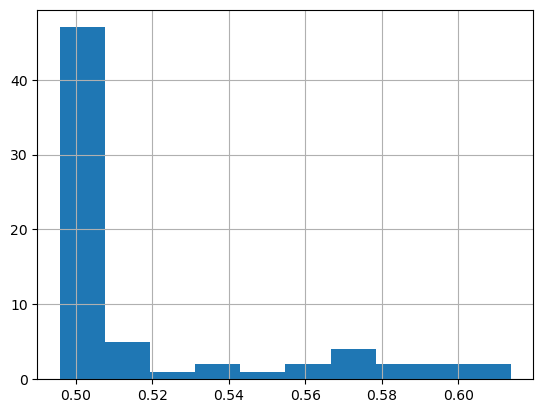

In [5]:
import matplotlib.pyplot as plt
results_df = pd.read_csv('assay_auc_by_threshold_with_confusion_Ha.csv')

results_df[results_df["Assay"]=="737822"]["Balanced Accuracy"].hist()
plt.show()

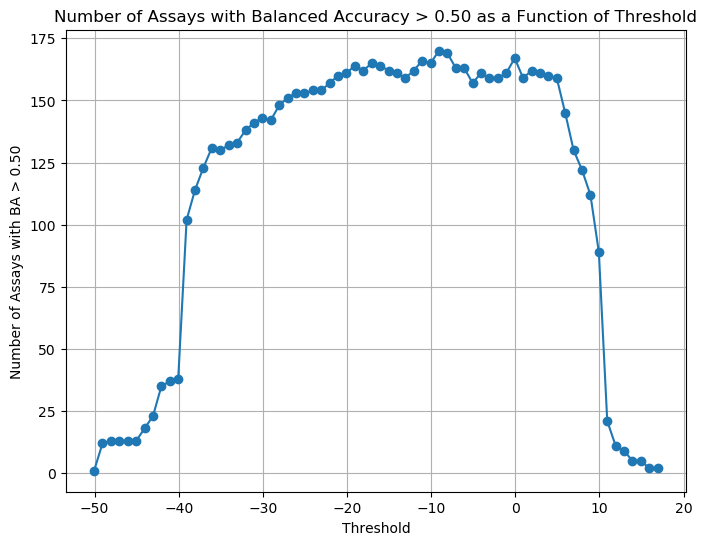

In [6]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['Balanced Accuracy'] > 0.50).sum()).reset_index(name='Assays with BA > 0.50')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with BA > 0.50'], marker='o', linestyle='-')
plt.title('Number of Assays with Balanced Accuracy > 0.50 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with BA > 0.50')
plt.grid(True)
plt.show()

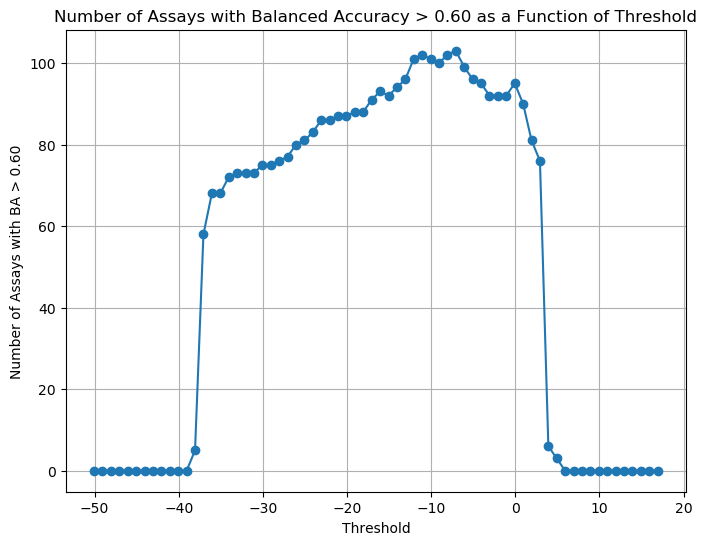

In [7]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['Balanced Accuracy'] > 0.60).sum()).reset_index(name='Assays with BA > 0.60')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with BA > 0.60'], marker='o', linestyle='-')
plt.title('Number of Assays with Balanced Accuracy > 0.60 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with BA > 0.60')
plt.grid(True)
plt.show()


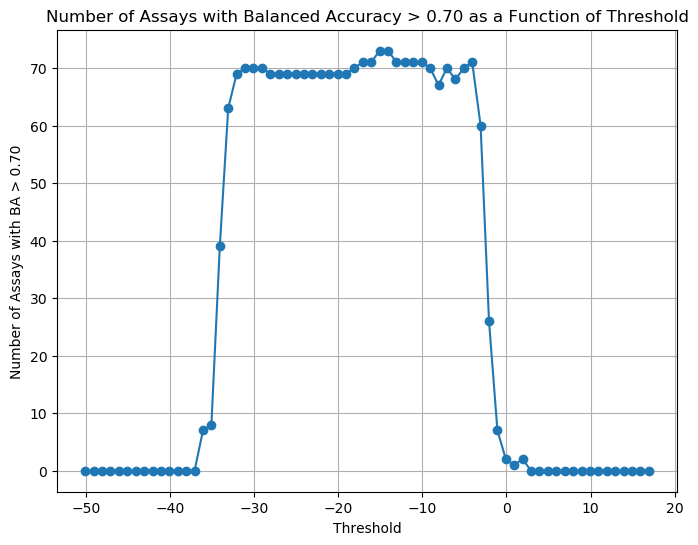

In [8]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['Balanced Accuracy'] > 0.70).sum()).reset_index(name='Assays with BA > 0.70')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with BA > 0.70'], marker='o', linestyle='-')
plt.title('Number of Assays with Balanced Accuracy > 0.70 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with BA > 0.70')
plt.grid(True)
plt.show()


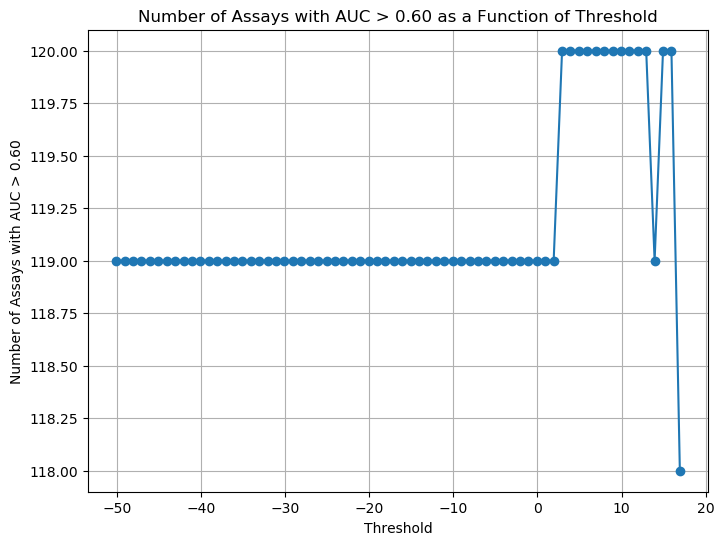

In [9]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['AUC'] > 0.60).sum()).reset_index(name='Assays with AUC > 0.60')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with AUC > 0.60'], marker='o', linestyle='-')
plt.title('Number of Assays with AUC > 0.60 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with AUC > 0.60')
plt.grid(True)
plt.show()


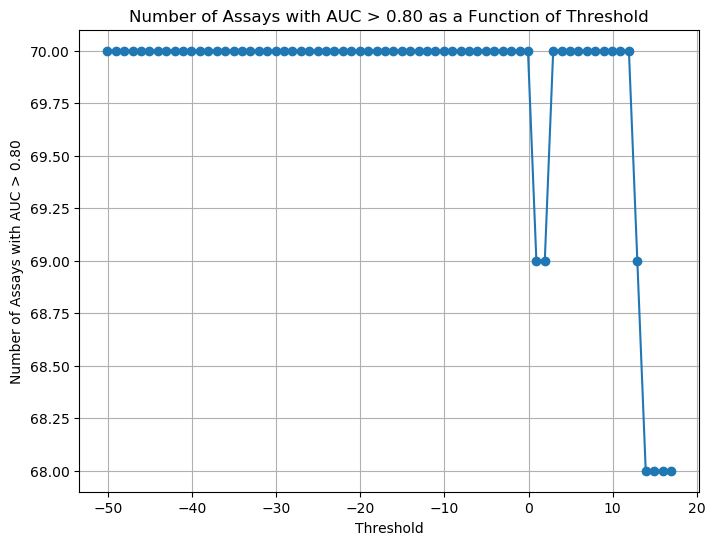

In [10]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['AUC'] > 0.80).sum()).reset_index(name='Assays with AUC > 0.80')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with AUC > 0.80'], marker='o', linestyle='-')
plt.title('Number of Assays with AUC > 0.80 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with AUC > 0.80')
plt.grid(True)
plt.show()


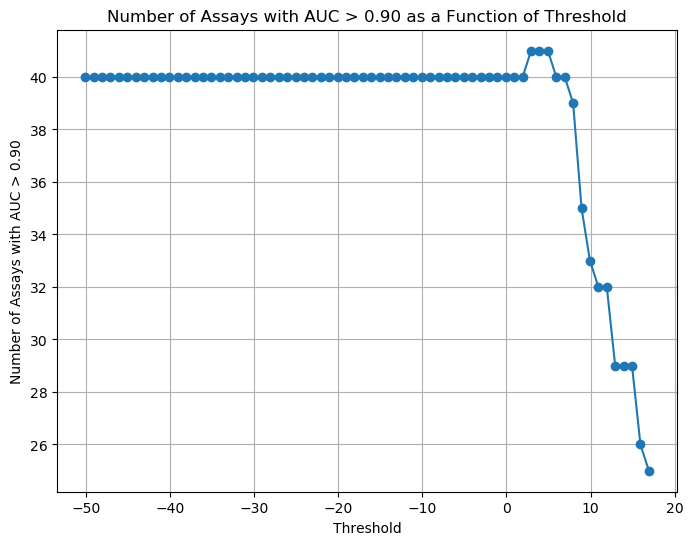

In [11]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['AUC'] > 0.90).sum()).reset_index(name='Assays with AUC > 0.90')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with AUC > 0.90'], marker='o', linestyle='-')
plt.title('Number of Assays with AUC > 0.90 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with AUC > 0.90')
plt.grid(True)
plt.show()


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


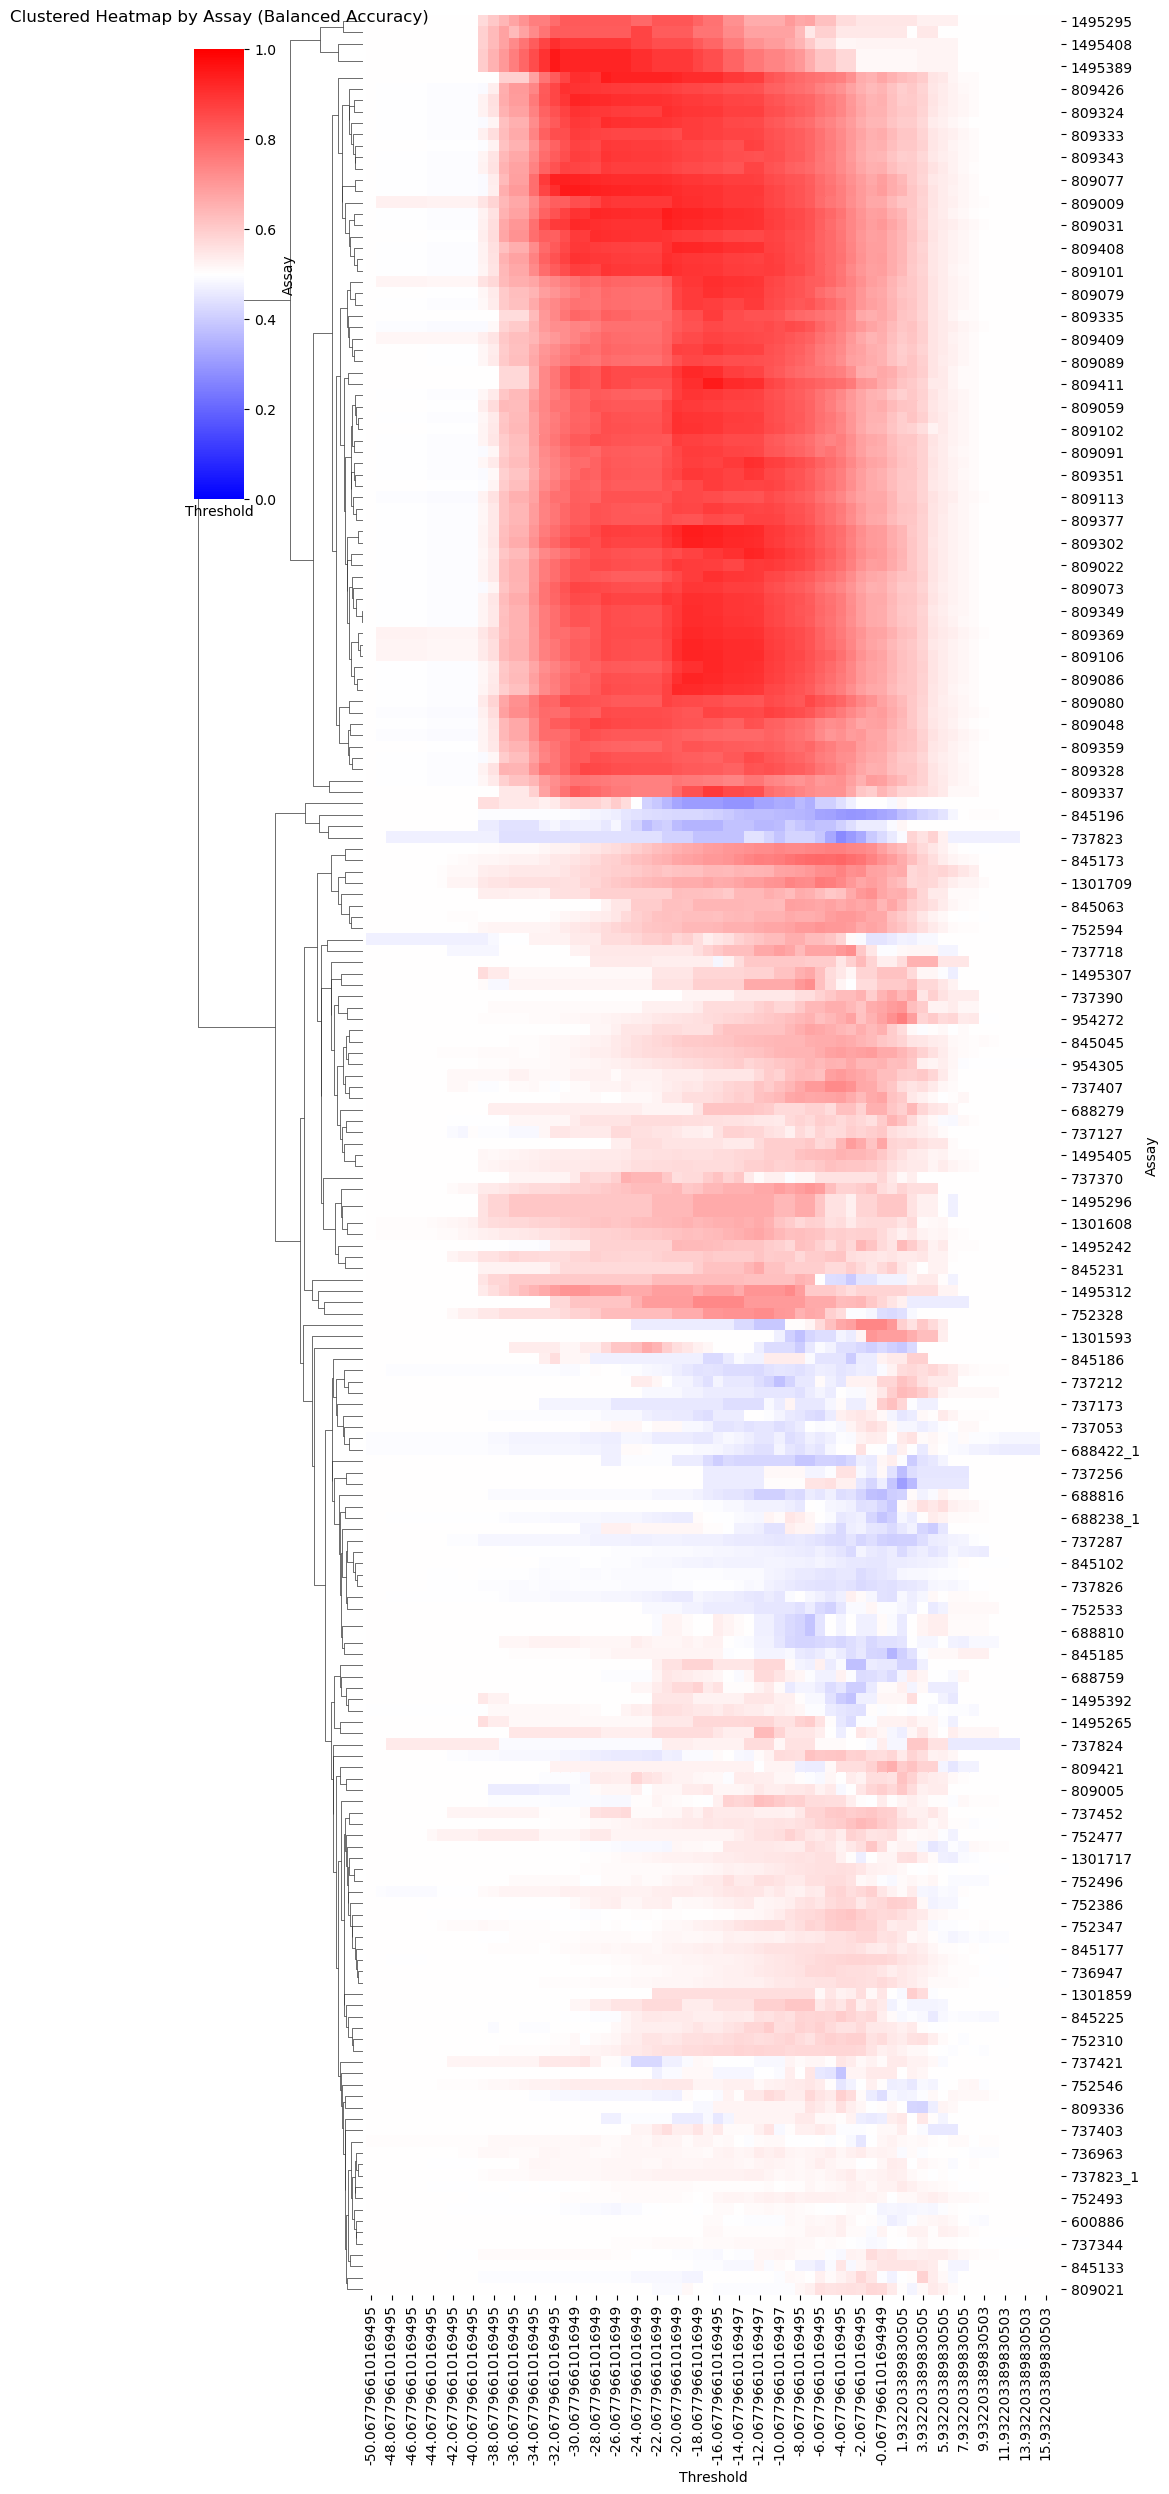

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, 'blue'), (0.5, 'white'), (1, 'red')])

# Create a pivot table for the heatmap, with 'Assay' as rows, 'Threshold' as columns, and 'Balanced Accuracy' as values
heatmap_data = results_df.pivot(index='Assay', columns='Threshold', values='Balanced Accuracy')

# Plot the clustered heatmap with clustering only by Assay (rows)
sns.clustermap(heatmap_data, cmap=custom_cmap, cbar=True, figsize=(10, 25), 
               row_cluster=True, col_cluster=False, dendrogram_ratio=(0.2, 0), method='average',
               center=0.5, vmin=0, vmax=1)

plt.title('Clustered Heatmap by Assay (Balanced Accuracy)', pad=20)
plt.xlabel('Threshold')
plt.ylabel('Assay')
plt.show()


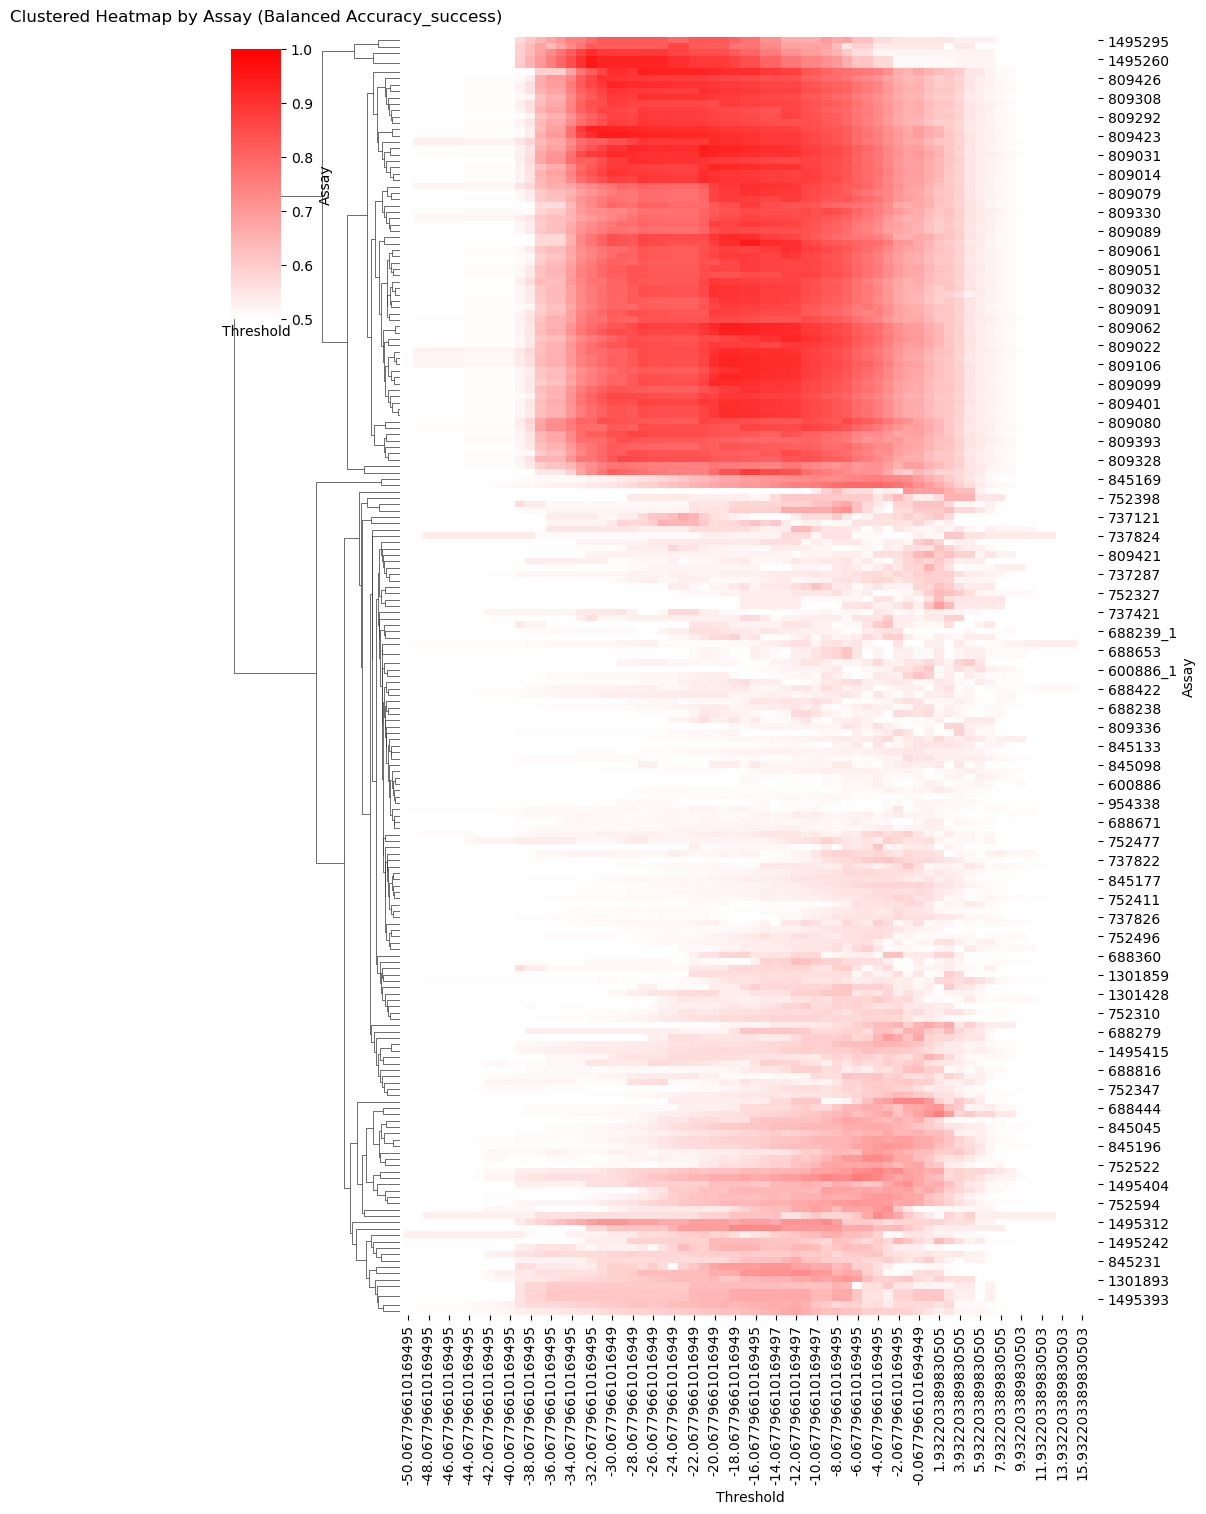

In [13]:
results_df["Balanced Accuracy_success"] = results_df["Balanced Accuracy"].apply(lambda x: 1 - x if x < 0.5 else x)
results_df["AUC_success"] = results_df["AUC"].apply(lambda x: 1 - x if x < 0.5 else x)


custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, 'blue'), (0.5, 'white'), (1, 'red')])

# Create a pivot table for the heatmap, with 'Assay' as rows, 'Threshold' as columns, and 'Balanced Accuracy' as values
heatmap_data = results_df.pivot(index='Assay', columns='Threshold', values='Balanced Accuracy_success')

# Plot the clustered heatmap with clustering only by Assay (rows)
sns.clustermap(heatmap_data, cmap=custom_cmap, cbar=True, figsize=(10, 15), 
               row_cluster=True, col_cluster=False, dendrogram_ratio=(0.2, 0), method='average',
               center=0.5, vmin=0.5, vmax=1)

plt.title('Clustered Heatmap by Assay (Balanced Accuracy_success)', pad=20)
plt.xlabel('Threshold')
plt.ylabel('Assay')
plt.show()


In [20]:
results_df

,Assay,Accuracy,Balanced Accuracy,Recall,Precision,Threshold,AUC,TP,FP,TN,FN,Balanced Accuracy_success,AUC_success
0,737823,0.515152,0.500000,0.0,0.000000,-50.067797,0.371324,0,0,17,16,0.500000,0.628676
1,737823,0.515152,0.500000,0.0,0.000000,-49.067797,0.371324,0,0,17,16,0.500000,0.628676
2,737823,0.484848,0.470588,0.0,0.000000,-48.067797,0.371324,0,1,16,16,0.529412,0.628676
3,737823,0.484848,0.470588,0.0,0.000000,-47.067797,0.371324,0,1,16,16,0.529412,0.628676
4,737823,0.484848,0.470588,0.0,0.000000,-46.067797,0.371324,0,1,16,16,0.529412,0.628676
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13663,1495346,0.143501,0.500000,1.0,0.143501,12.932203,0.759884,223,1331,0,0,0.500000,0.759884
13664,1495346,0.143501,0.500000,1.0,0.143501,13.932203,0.759968,223,1331,0,0,0.500000,0.759968
13665,1495346,0.143501,0.500000,1.0,0.143501,14.932203,0.759898,223,1331,0,0,0.500000,0.759898
13666,1495346,0.143501,0.500000,1.0,0.143501,15.932203,0.759884,223,1331,0,0,0.500000,0.759884


In [14]:
import pandas as pd

detailed_target_map  = pd.read_csv("../The_Ha_Files/data/output/detailed_target_map.csv")
detailed_target_map

,Unnamed: 0,ASSAY_ID,assay_chembl_id,target_chembl_id,target_type,target_name,organism,gene_symbol
0,0,737823,CHEMBL1741322,CHEMBL3356,SINGLE PROTEIN,Cytochrome P450 1A2,Homo sapiens,CYP1A2
1,1,737824,CHEMBL1741323,CHEMBL3622,SINGLE PROTEIN,Cytochrome P450 2C19,Homo sapiens,CYP2C19
2,2,688422,CHEMBL1614544,CHEMBL1293235,SINGLE PROTEIN,Prelamin-A/C,Homo sapiens,LMNA
3,3,688810,CHEMBL1613836,CHEMBL1615322,NUCLEIC-ACID,microRNA 21,Homo sapiens,TNRC6A
4,4,688812,CHEMBL1613838,CHEMBL1293294,SINGLE PROTEIN,Ras-related protein Rab-9A,Homo sapiens,RAB9A
...,...,...,...,...,...,...,...,...
196,196,1301866,CHEMBL3214913,CHEMBL612545,UNCHECKED,Unchecked,NaN,Unknown
197,197,1301890,CHEMBL3214967,CHEMBL2029197,SINGLE PROTEIN,Rap guanine nucleotide exchange factor 3,Homo sapiens,RAPGEF6
198,198,1301859,CHEMBL3214906,CHEMBL2029198,SINGLE PROTEIN,Rap guanine nucleotide exchange factor 4,Homo sapiens,RAPGEF4
199,199,1301893,CHEMBL3214970,CHEMBL612545,UNCHECKED,Unchecked,NaN,Unknown


In [28]:
detailed_target_map.target_type.value_counts()

SINGLE PROTEIN     78
CELL-LINE          69
UNCHECKED          43
ORGANISM            5
PROTEIN COMPLEX     3
NUCLEIC-ACID        2
NON-MOLECULAR       1
Name: target_type, dtype: int64

In [17]:
import requests
import pandas as pd
from tqdm import tqdm
from pandarallel import pandarallel
pandarallel.initialize()

# Function to get assay type for a given ChEMBL ID
def get_assay_type(chembl_id):
    url = f'https://www.ebi.ac.uk/chembl/api/data/assay/{chembl_id}'
    headers = {'Accept': 'application/json'}
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()
        assay_type = data.get('assay_type', 'Unknown')
        return assay_type
    except requests.exceptions.RequestException as e:
        print(f"Error fetching {chembl_id}: {e}")
        return 'Error'

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [18]:
detailed_target_map["assay_type"] = detailed_target_map["assay_chembl_id"].parallel_apply(get_assay_type)

In [19]:
detailed_target_map

,Unnamed: 0,ASSAY_ID,assay_chembl_id,target_chembl_id,target_type,target_name,organism,gene_symbol,assay_type
0,0,737823,CHEMBL1741322,CHEMBL3356,SINGLE PROTEIN,Cytochrome P450 1A2,Homo sapiens,CYP1A2,F
1,1,737824,CHEMBL1741323,CHEMBL3622,SINGLE PROTEIN,Cytochrome P450 2C19,Homo sapiens,CYP2C19,F
2,2,688422,CHEMBL1614544,CHEMBL1293235,SINGLE PROTEIN,Prelamin-A/C,Homo sapiens,LMNA,F
3,3,688810,CHEMBL1613836,CHEMBL1615322,NUCLEIC-ACID,microRNA 21,Homo sapiens,TNRC6A,F
4,4,688812,CHEMBL1613838,CHEMBL1293294,SINGLE PROTEIN,Ras-related protein Rab-9A,Homo sapiens,RAB9A,F
...,...,...,...,...,...,...,...,...,...
196,196,1301866,CHEMBL3214913,CHEMBL612545,UNCHECKED,Unchecked,NaN,Unknown,B
197,197,1301890,CHEMBL3214967,CHEMBL2029197,SINGLE PROTEIN,Rap guanine nucleotide exchange factor 3,Homo sapiens,RAPGEF6,F
198,198,1301859,CHEMBL3214906,CHEMBL2029198,SINGLE PROTEIN,Rap guanine nucleotide exchange factor 4,Homo sapiens,RAPGEF4,F
199,199,1301893,CHEMBL3214970,CHEMBL612545,UNCHECKED,Unchecked,NaN,Unknown,F


In [21]:
results_df = pd.merge(detailed_target_map, results_df, left_on="ASSAY_ID", right_on="Assay")
results_df

,Unnamed: 0,ASSAY_ID,assay_chembl_id,target_chembl_id,target_type,target_name,organism,gene_symbol,assay_type,Assay,...,Recall,Precision,Threshold,AUC,TP,FP,TN,FN,Balanced Accuracy_success,AUC_success
0,0,737823,CHEMBL1741322,CHEMBL3356,SINGLE PROTEIN,Cytochrome P450 1A2,Homo sapiens,CYP1A2,F,737823,...,0.0,0.000000,-50.067797,0.371324,0,0,17,16,0.500000,0.628676
1,0,737823,CHEMBL1741322,CHEMBL3356,SINGLE PROTEIN,Cytochrome P450 1A2,Homo sapiens,CYP1A2,F,737823,...,0.0,0.000000,-49.067797,0.371324,0,0,17,16,0.500000,0.628676
2,0,737823,CHEMBL1741322,CHEMBL3356,SINGLE PROTEIN,Cytochrome P450 1A2,Homo sapiens,CYP1A2,F,737823,...,0.0,0.000000,-48.067797,0.371324,0,1,16,16,0.529412,0.628676
3,0,737823,CHEMBL1741322,CHEMBL3356,SINGLE PROTEIN,Cytochrome P450 1A2,Homo sapiens,CYP1A2,F,737823,...,0.0,0.000000,-47.067797,0.371324,0,1,16,16,0.529412,0.628676
4,0,737823,CHEMBL1741322,CHEMBL3356,SINGLE PROTEIN,Cytochrome P450 1A2,Homo sapiens,CYP1A2,F,737823,...,0.0,0.000000,-46.067797,0.371324,0,1,16,16,0.529412,0.628676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13663,200,1495346,CHEMBL3562077,CHEMBL612545,UNCHECKED,Unchecked,NaN,Unknown,F,1495346,...,1.0,0.143501,12.932203,0.759884,223,1331,0,0,0.500000,0.759884
13664,200,1495346,CHEMBL3562077,CHEMBL612545,UNCHECKED,Unchecked,NaN,Unknown,F,1495346,...,1.0,0.143501,13.932203,0.759968,223,1331,0,0,0.500000,0.759968
13665,200,1495346,CHEMBL3562077,CHEMBL612545,UNCHECKED,Unchecked,NaN,Unknown,F,1495346,...,1.0,0.143501,14.932203,0.759898,223,1331,0,0,0.500000,0.759898
13666,200,1495346,CHEMBL3562077,CHEMBL612545,UNCHECKED,Unchecked,NaN,Unknown,F,1495346,...,1.0,0.143501,15.932203,0.759884,223,1331,0,0,0.500000,0.759884


In [30]:
# Define the threshold percentage (e.g., 70%) for "most" of the thresholds
threshold_percentage = 0.4

# Group by Assay and check if more than 70% of the 'Balanced Accuracy_success' values are > 0.6
assays_with_most_ba_success = results_df.groupby('ASSAY_ID').filter(lambda x: (x['Balanced Accuracy_success'] > 0.7).mean() > threshold_percentage)

# Extract the list of assays
assay_list_most = assays_with_most_ba_success['assay_chembl_id'].unique()

# Display the list of assays
assay_list_most

array(['CHEMBL1963976', 'CHEMBL1963981', 'CHEMBL1963985', 'CHEMBL1963989',
       'CHEMBL1963990', 'CHEMBL1963991', 'CHEMBL1963994', 'CHEMBL1964017',
       'CHEMBL1964018', 'CHEMBL1964021', 'CHEMBL1964025', 'CHEMBL1964030',
       'CHEMBL1964034', 'CHEMBL1964037', 'CHEMBL1964040', 'CHEMBL1964043',
       'CHEMBL1964045', 'CHEMBL1964047', 'CHEMBL1964048', 'CHEMBL1964059',
       'CHEMBL1964062', 'CHEMBL1964063', 'CHEMBL1964065', 'CHEMBL1964066',
       'CHEMBL1964072', 'CHEMBL1964075', 'CHEMBL1964077', 'CHEMBL1964085',
       'CHEMBL1964086', 'CHEMBL1964087', 'CHEMBL1964088', 'CHEMBL1964091',
       'CHEMBL1964092', 'CHEMBL1964099', 'CHEMBL1963844', 'CHEMBL1963854',
       'CHEMBL1963860', 'CHEMBL1963866', 'CHEMBL1963868', 'CHEMBL1963874',
       'CHEMBL1963876', 'CHEMBL1963880', 'CHEMBL1963882', 'CHEMBL1963885',
       'CHEMBL1963887', 'CHEMBL1963889', 'CHEMBL1963895', 'CHEMBL1963900',
       'CHEMBL1963901', 'CHEMBL1963903', 'CHEMBL1963911', 'CHEMBL1963921',
       'CHEMBL1963922', '

In [31]:
target_mapdf=detailed_target_map[detailed_target_map.assay_chembl_id.isin(assay_list_most)]
target_mapdf

,Unnamed: 0,ASSAY_ID,assay_chembl_id,target_chembl_id,target_type,target_name,organism,gene_symbol,assay_type
43,43,809009,CHEMBL1963976,CHEMBL614078,CELL-LINE,MDA-N,Homo sapiens,AFAP1,F
44,44,809014,CHEMBL1963981,CHEMBL614054,CELL-LINE,SN12C,Homo sapiens,Unknown,F
45,45,809018,CHEMBL1963985,CHEMBL614997,CELL-LINE,NCI-H23,Homo sapiens,Unknown,F
46,46,809022,CHEMBL1963989,CHEMBL614519,CELL-LINE,ACHN,Homo sapiens,LARP6,F
47,47,809023,CHEMBL1963990,CHEMBL614388,CELL-LINE,UO-31,Homo sapiens,qoxA,F
...,...,...,...,...,...,...,...,...,...
104,104,809426,CHEMBL1964007,CHEMBL614919,CELL-LINE,SK-MEL-28,Homo sapiens,WIPI1,F
105,105,809428,CHEMBL1964009,CHEMBL614886,CELL-LINE,RXF 393,Homo sapiens,Unknown,F
106,106,809431,CHEMBL1964012,CHEMBL614561,CELL-LINE,COLO 205,Homo sapiens,ST3GAL4,F
125,125,1495389,CHEMBL3562120,CHEMBL612545,UNCHECKED,Unchecked,NaN,Unknown,F


In [32]:
len(target_mapdf)

66

In [34]:
66/201

0.3283582089552239